In [1]:
# medir
from timeit import timeit

# graficar
import pandas as pd

# tp2
from tp2.archivos import leer_archivo
from tp2.entrenamiento import *

ganancia_por_dia, energia_por_dia = leer_archivo("../examples/5000.txt")

def medir_mejor_ganancia(cant_dias, metodo):
    iteraciones = 3
    _ganancia_por_dia = ganancia_por_dia[:cant_dias]
    tiempo_ejecucion = timeit(lambda: metodo(_ganancia_por_dia, energia_por_dia), number=iteraciones) / iteraciones
    return tiempo_ejecucion * 1000


Comparamos la complejidad de los algoritmos
- Recursivo
- Recursivo con Memoización
- Iterativo con Memoización

Observamos que el algoritmo recursivo sin memoización tiene una complejidad muy alta y obtenemos mejores rendimientos con memoización

(10, 3)


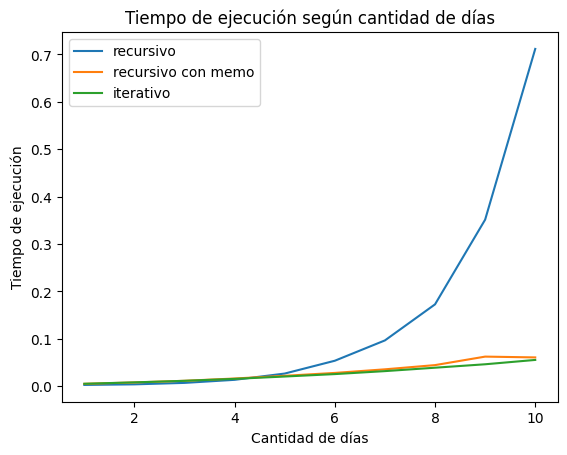

In [2]:
mediciones = 10
step = 1
cant_dias = [i + step for i in range(0, mediciones * step, step)]

df = pd.DataFrame({
    "recursivo": [medir_mejor_ganancia(dias, mejor_ganancia_recursivo) for dias in cant_dias],
    "recursivo con memo": [medir_mejor_ganancia(dias, mejor_ganancia_recursivo_con_memoria) for dias in cant_dias],
    "iterativo": [medir_mejor_ganancia(dias, mejor_ganancia_iterativo) for dias in cant_dias],
    }, index=cant_dias)

print(df.shape)

plot = df.plot.line(
    title="Tiempo de ejecución según cantidad de días",
    xlabel="Cantidad de días",
    ylabel="Tiempo de ejecución",
)

Comparamos los algoritmos que usan memoización con valores más altos

(10, 2)


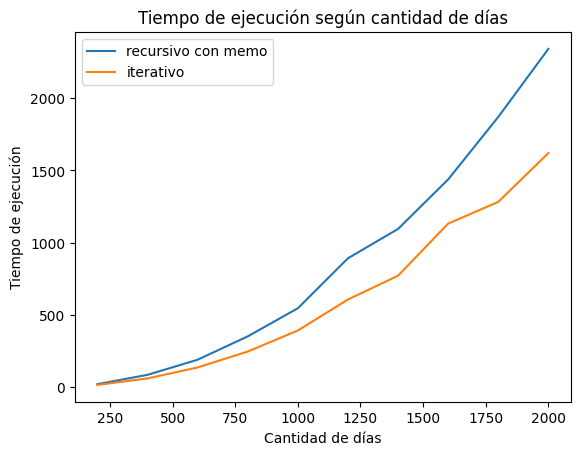

In [3]:
mediciones = 10
step = 200
cant_dias = [i + step for i in range(0, mediciones * step, step)]

df = pd.DataFrame({
    "recursivo con memo": [medir_mejor_ganancia(dias, mejor_ganancia_recursivo_con_memoria) for dias in cant_dias],
    "iterativo": [medir_mejor_ganancia(dias, mejor_ganancia_iterativo) for dias in cant_dias],
    }, index=cant_dias)

print(df.shape)

plot = df.plot.line(
    title="Tiempo de ejecución según cantidad de días",
    xlabel="Cantidad de días",
    ylabel="Tiempo de ejecución",
)